In [161]:
# required packages to fetch and process data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [162]:
# load medals data using pandas
medals_data = pd.read_csv("medals.csv")

# Exploratory Data Analysis

In [163]:
medals_data.head()

,Games,Year,Sport,Discipline,Athlete,Team,Gender,Event,Medal,Gold,Silver,Bronze
0,Athens (1896),1896,Aquatics,Swimming,alfred hajos,HUN,Men,100m freestyle men,Gold,1,0,0
1,Athens (1896),1896,Aquatics,Swimming,Otto Herschmann,AUT,Men,100m freestyle men,Silver,0,1,0
2,Athens (1896),1896,Aquatics,Swimming,dimitrios drivas,GRE,Men,100m freestyle for sailors men,Bronze,0,0,1
3,Athens (1896),1896,Aquatics,Swimming,Ioannis Malokinis,GRE,Men,100m freestyle for sailors men,Gold,1,0,0
4,Athens (1896),1896,Aquatics,Swimming,spiridon chasapis,GRE,Men,100m freestyle for sailors men,Silver,0,1,0


In [164]:
medals_data.describe()

,Year,Gold,Silver,Bronze
count,33261.000000,33261.00000,33261.000000,33261.000000
mean,1973.340188,0.33640,0.330327,0.333544
std,33.940163,0.47534,0.470338,0.471486
min,1896.000000,0.00000,0.000000,0.000000
25%,1952.000000,0.00000,0.000000,0.000000
50%,1984.000000,0.00000,0.000000,0.000000
75%,2000.000000,1.00000,1.000000,1.000000
max,2016.000000,10.00000,1.000000,1.000000


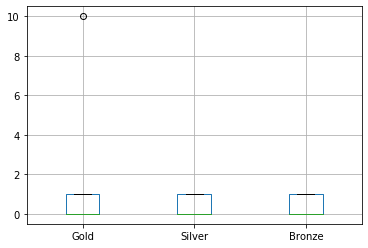

In [165]:
medals_data.boxplot(column=['Gold','Silver','Bronze'])

In [166]:
# looks like there is an outlier for GOLD which is 10. assuming Gold, Silver, Bronze columns are flag values with 1.  
#replacing this 10 value with 1
medals_data['Gold'] = np.where(medals_data['Gold'] > 1, 1, medals_data['Gold'])

In [167]:
medals_data.isna().sum()

Games         0
Year          0
Sport         0
Discipline    0
Athlete       0
Team          0
Gender        0
Event         0
Medal         0
Gold          0
Silver        0
Bronze        0
dtype: int64

In [168]:
medals_data.isnull().sum()

Games         0
Year          0
Sport         0
Discipline    0
Athlete       0
Team          0
Gender        0
Event         0
Medal         0
Gold          0
Silver        0
Bronze        0
dtype: int64

In [169]:
medals_data.columns

Index(['Games', 'Year', 'Sport', 'Discipline', 'Athlete', 'Team', 'Gender',
       'Event', 'Medal', 'Gold', 'Silver', 'Bronze'],
      dtype='object')

In [170]:
# converting some columns string into lower case as it may effect in count and sum aggregations
medals_data['Sport'] = medals_data['Sport'].map(lambda x: x.lower())
medals_data['Athlete'] = medals_data['Athlete'].map(lambda x: x.lower())
medals_data['Event'] = medals_data['Event'].map(lambda x: x.lower())

In [206]:
# let's create a small number of columns dataset required for tasks.
df= medals_data.loc[:,['Sport','Athlete','Event','Medal','Gold','Silver','Bronze']]

# Q1. Five athletes who won the most gold medals in Athletics 

In [208]:
top5_athlets = df[df['Sport']=='athletics'].groupby(['Athlete'])['Gold'].sum().reset_index().sort_values('Gold',ascending=False).head()

In [209]:
top5_athlets

,Athlete,Gold
333,carl lewis,20
2574,usain bolt,9
2088,paavo nurmi,9
2182,ray ewry,8
94,allyson felix,6


# Q2. Five athletes who won gold medals in the largest number of different athletic events

In [289]:
# grouping athelts to different events and counting number of gold medals by each athlete
events_data = df.groupby(["Event","Athlete"])['Gold'].sum().reset_index()

In [290]:
# excluding unwanted rows where there are no gold medals by athlet
events_data = events_data[events_data['Gold']>0]

In [291]:
# fetching first 5 of greatest gold medals of different events
top5_in_events = events_data.groupby(["Event"]).apply(lambda x: x.sort_values(['Gold'],ascending=False)).reset_index(drop=True).groupby('Event').head(5)

# Q3. Top Five of different athletic events after removing guilty athlets

In [294]:
# finding list of Athlets found guilty within each event group. if event group does not contain 3 gold medal winners, it will fetch only first as guilt.
guilty_list = top5_in_events.groupby(["Event"]).apply(lambda x: x.iloc[[0,2]] if len(x) >=3 else x.iloc[[0]]).reset_index(drop=True)

In [295]:
# using outer join to find guilty found Athlet names in each event and excluding them main events data list.
final_list= pd.merge(events_data,guilty_list,how='outer', indicator=True)

In [ ]:
final_list=final_list.loc[final_list._merge=='left_only',['Event', 'Athlete', 'Gold']]

In [ ]:
# this line will fetch greatest gold medals of different events after excluding guilty found athlets.
final_top5_in_events = final_list.groupby(["Event"]).apply(lambda x: x.sort_values(['Gold'],ascending=False)).reset_index(drop=True).groupby('Event').head()